In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [63]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/bank15.csv')
data.head()

job  marital  balance  loan  contact  day  month  duration  poutcome  \
0    0        1     2343     0        2    5      8      1042         3   
1    0        1       45     0        2    5      8      1467         3   
2    9        1     1270     0        2    5      8      1389         3   
3    7        1     2476     0        2    5      8       579         3   
4    0        1      184     0        2    5      8       673         3   

   deposit  
0        1  
1        1  
2        1  
3        1  
4        1

In [64]:


# Split features and target
X = data.drop('deposit', axis=1)
y = data['deposit']

# Display the encoded dataset
print(X)
print(y)


       job  marital  balance  loan  contact  day  month  duration  poutcome
0        0        1     2343     0        2    5      8      1042         3
1        0        1       45     0        2    5      8      1467         3
2        9        1     1270     0        2    5      8      1389         3
3        7        1     2476     0        2    5      8       579         3
4        0        1      184     0        2    5      8       673         3
...    ...      ...      ...   ...      ...  ...    ...       ...       ...
11157    1        2        1     0        0   20      0       257         3
11158    7        1      733     0        2   16      6        83         3
11159    9        2       29     0        0   19      1       156         3
11160    9        1        0     1        0    8      8         9         0
11161    9        1        0     0        0    9      5       628         3

[11162 rows x 9 columns]
0        1
1        1
2        1
3        1
4        1
       

In [65]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
!pip install xgboost

In [66]:
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize the XGB classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Accuracy: 0.8365427675772503
Precision: 0.8145161290322581
Recall: 0.851921274601687
F1-score: 0.8327989005955108
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



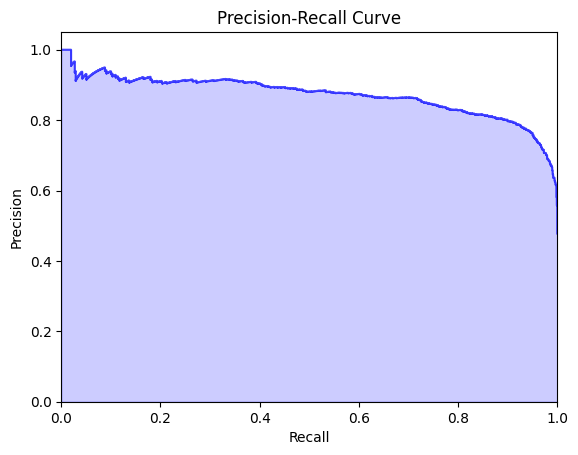

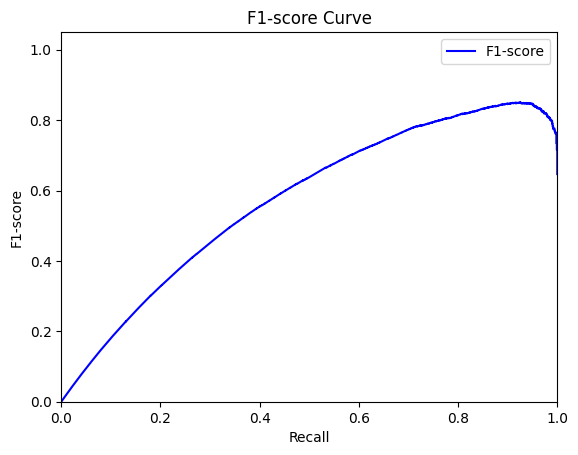

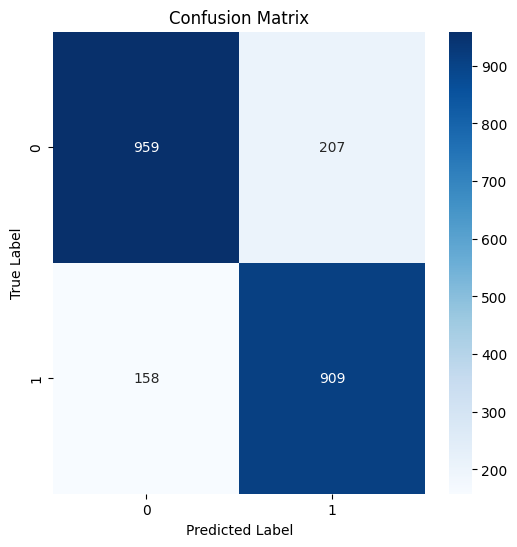

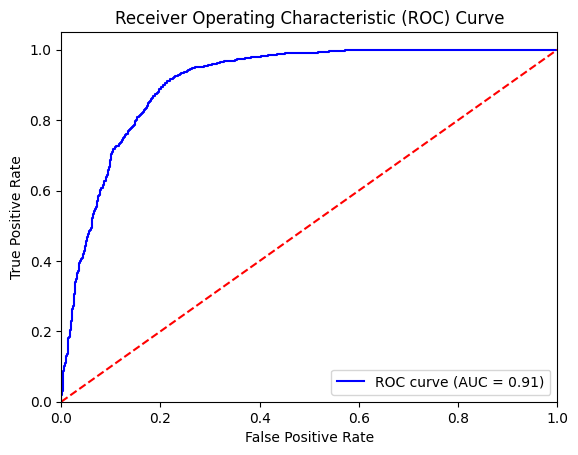

In [67]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGB classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [14]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/bank11.csv')
data.head()

age  marital  education  balance  housing  month  pdays  previous  \
0   59        1          1     2343        1      8     -1         0   
1   56        1          1       45        0      8     -1         0   
2   41        1          1     1270        1      8     -1         0   
3   55        1          1     2476        1      8     -1         0   
4   54        1          2      184        0      8     -1         0   

   poutcome  deposit  
0         3        1  
1         3        1  
2         3        1  
3         3        1  
4         3        1

In [15]:


# Split features and target
X = data.drop('deposit', axis=1)
y = data['deposit']

# Display the encoded dataset
print(X)
print(y)


       age  marital  education  balance  housing  month  pdays  previous  \
0       59        1          1     2343        1      8     -1         0   
1       56        1          1       45        0      8     -1         0   
2       41        1          1     1270        1      8     -1         0   
3       55        1          1     2476        1      8     -1         0   
4       54        1          2      184        0      8     -1         0   
...    ...      ...        ...      ...      ...    ...    ...       ...   
11157   33        2          0        1        1      0     -1         0   
11158   39        1          1      733        0      6     -1         0   
11159   32        2          1       29        0      1     -1         0   
11160   43        1          1        0        0      8    172         5   
11161   34        1          1        0        0      5     -1         0   

       poutcome  
0             3  
1             3  
2             3  
3             3

In [16]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize the XGB classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Accuracy: 0.6945812807881774
Precision: 0.7288941736028538
Recall: 0.5745079662605436
F1-score: 0.6425576519916142
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1166
           1       0.73      0.57      0.64      1067

    accuracy                           0.69      2233
   macro avg       0.70      0.69      0.69      2233
weighted avg       0.70      0.69      0.69      2233



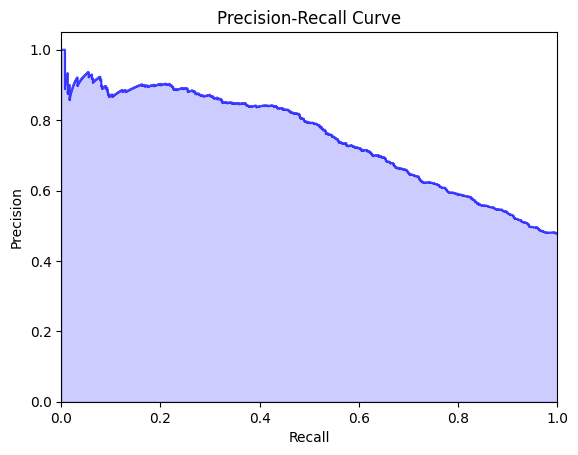

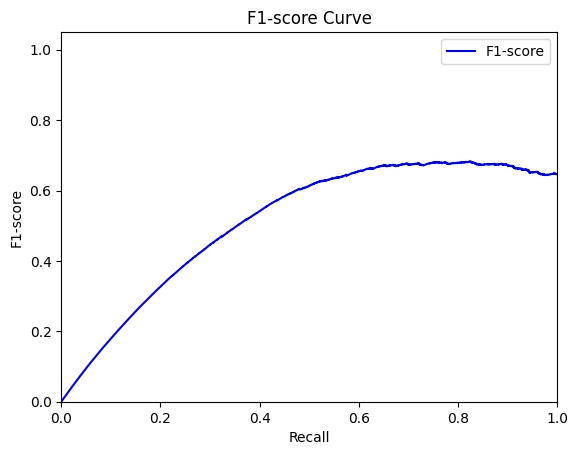

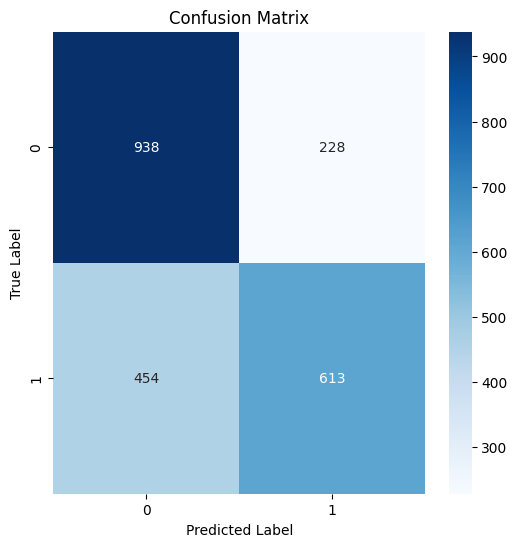

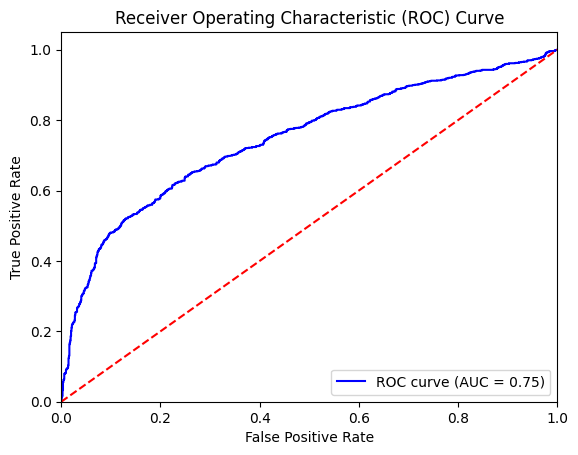

In [18]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGB classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [68]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/bank12.csv')
data.head()

age  marital  housing  pdays  previous  poutcome  deposit
0   59        1        1     -1         0         3        1
1   56        1        0     -1         0         3        1
2   41        1        1     -1         0         3        1
3   55        1        1     -1         0         3        1
4   54        1        0     -1         0         3        1

In [69]:


# Split features and target
X = data.drop('deposit', axis=1)
y = data['deposit']

# Display the encoded dataset
print(X)
print(y)


       age  marital  housing  pdays  previous  poutcome
0       59        1        1     -1         0         3
1       56        1        0     -1         0         3
2       41        1        1     -1         0         3
3       55        1        1     -1         0         3
4       54        1        0     -1         0         3
...    ...      ...      ...    ...       ...       ...
11157   33        2        1     -1         0         3
11158   39        1        0     -1         0         3
11159   32        2        0     -1         0         3
11160   43        1        0    172         5         0
11161   34        1        0     -1         0         3

[11162 rows x 6 columns]
0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64


In [70]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Accuracy: 0.6565158978952083
Precision: 0.7218934911242604
Recall: 0.45735707591377694
F1-score: 0.5599541021227769
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72      1166
           1       0.72      0.46      0.56      1067

    accuracy                           0.66      2233
   macro avg       0.68      0.65      0.64      2233
weighted avg       0.67      0.66      0.64      2233



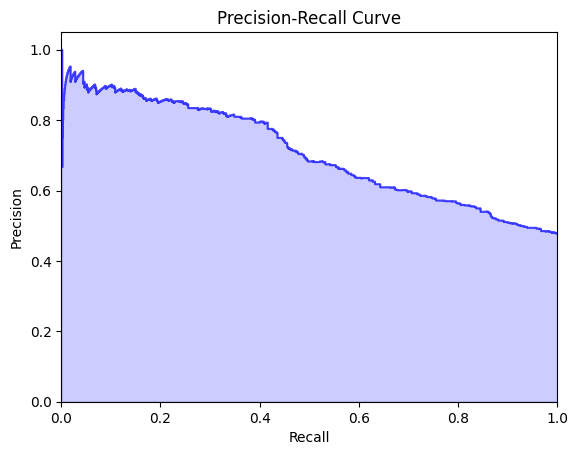

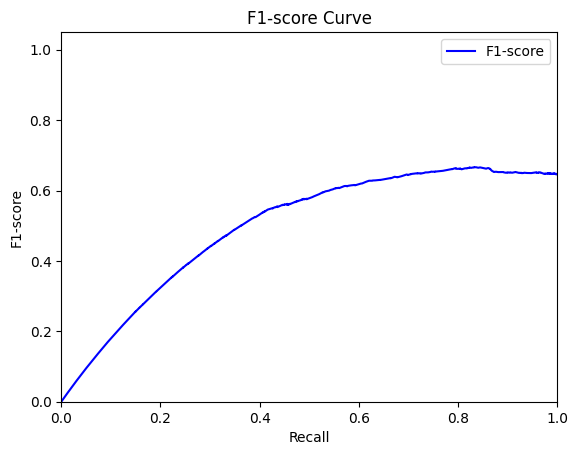

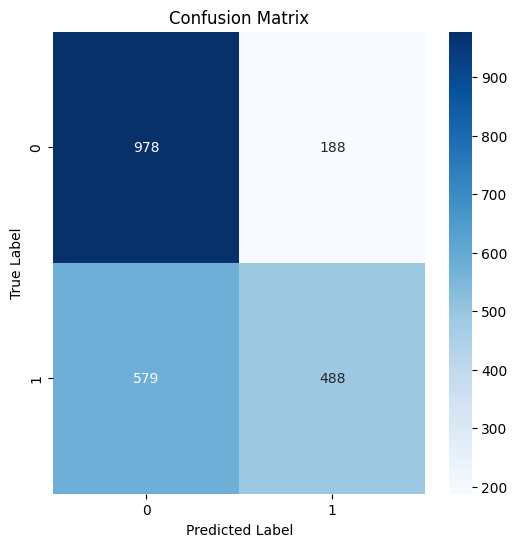

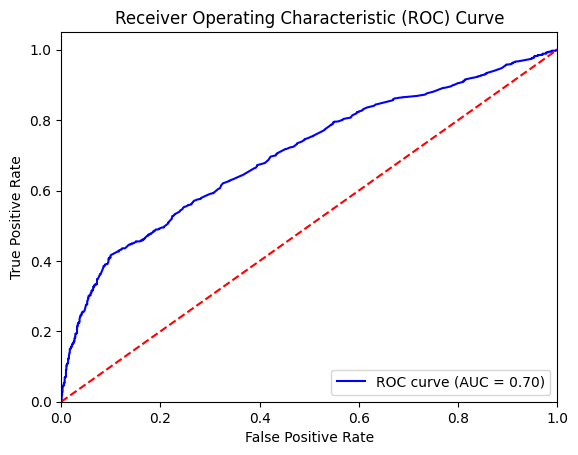

In [71]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGB classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [72]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/bank13a.csv')
data.head()

age  job  day  month  duration  poutcome  deposit
0   59    0    5      8      1042         3        1
1   56    0    5      8      1467         3        1
2   41    9    5      8      1389         3        1
3   55    7    5      8       579         3        1
4   54    0    5      8       673         3        1

In [73]:


# Split features and target
X = data.drop('deposit', axis=1)
y = data['deposit']

# Display the encoded dataset
print(X)
print(y)


       age  job  day  month  duration  poutcome
0       59    0    5      8      1042         3
1       56    0    5      8      1467         3
2       41    9    5      8      1389         3
3       55    7    5      8       579         3
4       54    0    5      8       673         3
...    ...  ...  ...    ...       ...       ...
11157   33    1   20      0       257         3
11158   39    7   16      6        83         3
11159   32    9   19      1       156         3
11160   43    9    8      8         9         0
11161   34    9    9      5       628         3

[11162 rows x 6 columns]
0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64


In [74]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Accuracy: 0.8378862516793552
Precision: 0.8178539224526601
Recall: 0.8500468603561387
F1-score: 0.833639705882353
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1166
           1       0.82      0.85      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



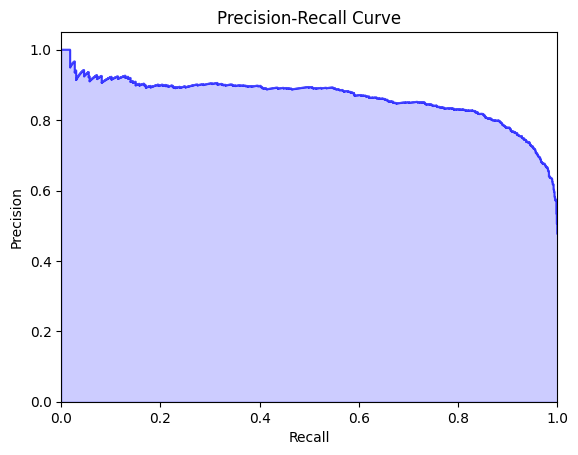

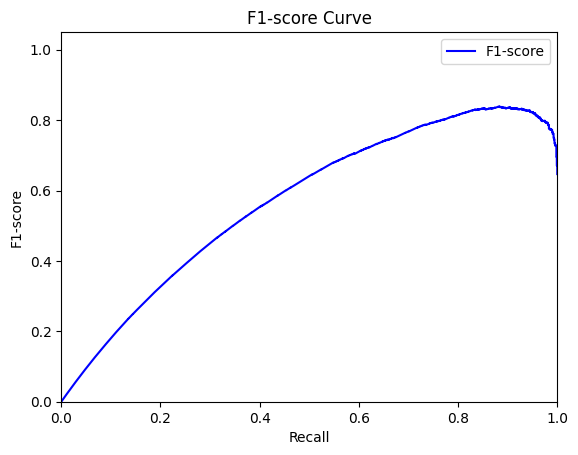

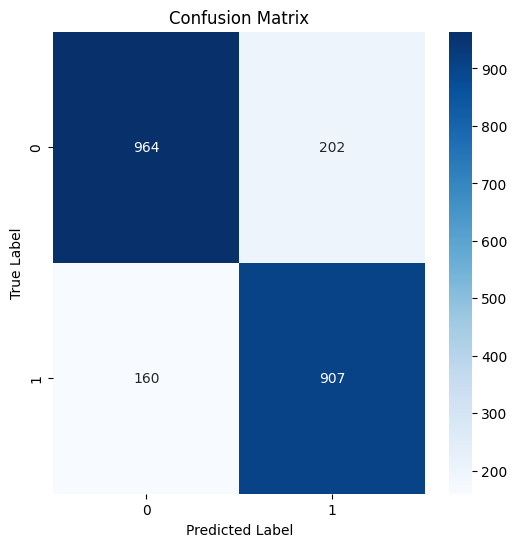

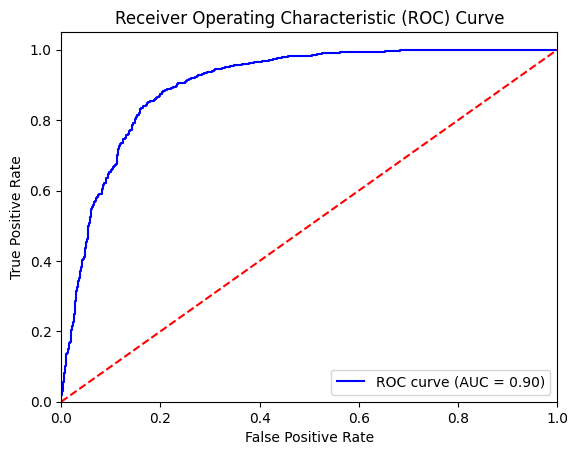

In [75]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGB classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [76]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/bank14.csv')
data.head()

age  marital  balance  housing  day  month  duration  pdays  previous  \
0   59        1     2343        1    5      8      1042     -1         0   
1   56        1       45        0    5      8      1467     -1         0   
2   41        1     1270        1    5      8      1389     -1         0   
3   55        1     2476        1    5      8       579     -1         0   
4   54        1      184        0    5      8       673     -1         0   

   poutcome  deposit  
0         3        1  
1         3        1  
2         3        1  
3         3        1  
4         3        1

In [77]:


# Split features and target
X = data.drop('deposit', axis=1)
y = data['deposit']

# Display the encoded dataset
print(X)
print(y)


       age  marital  balance  housing  day  month  duration  pdays  previous  \
0       59        1     2343        1    5      8      1042     -1         0   
1       56        1       45        0    5      8      1467     -1         0   
2       41        1     1270        1    5      8      1389     -1         0   
3       55        1     2476        1    5      8       579     -1         0   
4       54        1      184        0    5      8       673     -1         0   
...    ...      ...      ...      ...  ...    ...       ...    ...       ...   
11157   33        2        1        1   20      0       257     -1         0   
11158   39        1      733        0   16      6        83     -1         0   
11159   32        2       29        0   19      1       156     -1         0   
11160   43        1        0        0    8      8         9    172         5   
11161   34        1        0        0    9      5       628     -1         0   

       poutcome  
0             3  
1  

In [78]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Accuracy: 0.8320644872369011
Precision: 0.8100358422939068
Recall: 0.8472352389878163
F1-score: 0.8282180485570315
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



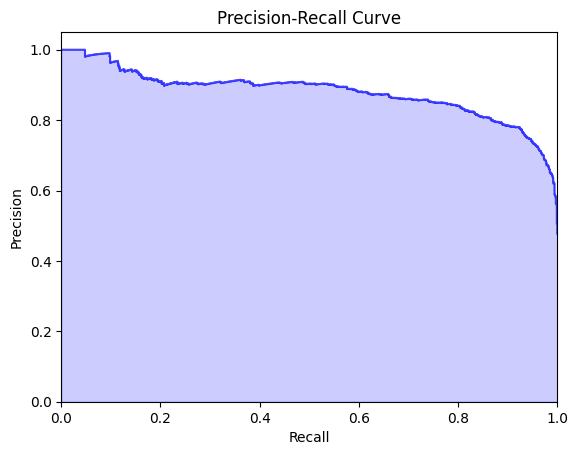

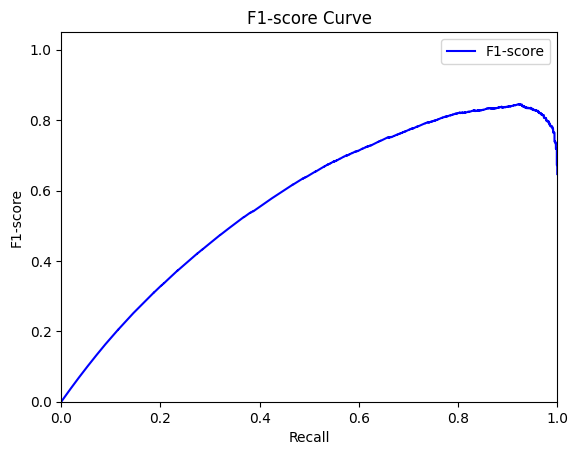

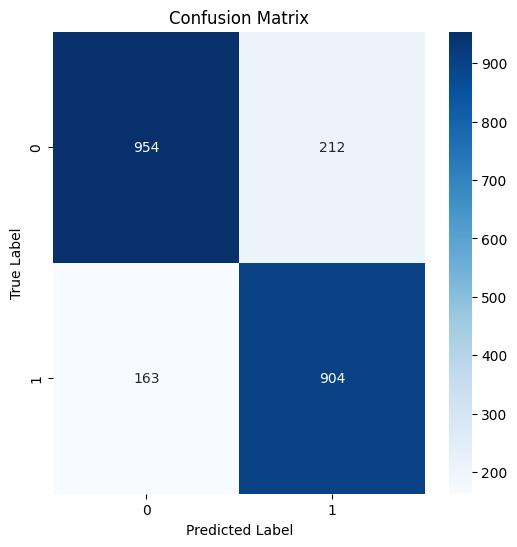

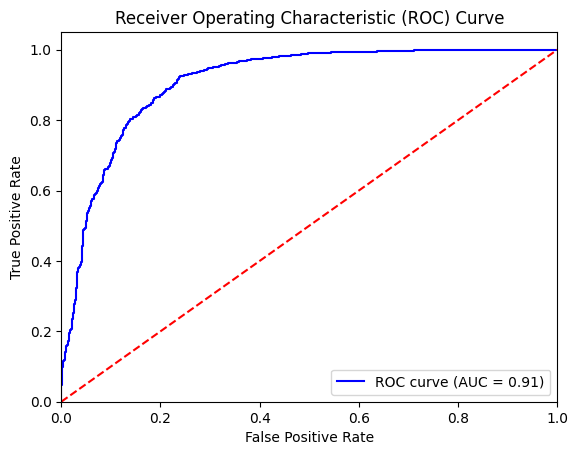

In [79]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGB classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = xgb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
